In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
actions_dict = {
        0:"design",
        1:"anesthesia",
        2:"incision",
        3:"dissection",
        4:"closure",
        5:"hemostasis"
    }
name = list(actions_dict.values())

# make seg_bars

In [108]:
def segment_bars_with_confidence(save_path, confidence, *labels):
    num_pics = len(labels) + 1
    color_map = plt.get_cmap('gist_rainbow')
 
    axprops = dict(xticks=[], yticks=[], frameon=False)
    barprops = dict(aspect='auto', cmap=color_map,
                    interpolation='nearest', vmin=0)
    fig = plt.figure(figsize=(15, num_pics * 1.5))
 
    interval = 1 / (num_pics+1)
    for i, label in enumerate(labels):
        i = i + 1
        ax1 = fig.add_axes([0, 1-i*interval, 1, interval])
        ax1.imshow([label], **barprops)
 
    ax4 = fig.add_axes([0, interval, 1, interval])
    ax4.set_xlim(0, len(confidence))
    ax4.set_ylim(0, 1)
    ax4.plot(range(len(confidence)), confidence)
    ax4.plot(range(len(confidence)), [0.3] * len(confidence), color='red', label='0.5')
 
    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()
 
    plt.close()

['design', 'anesthesia', 'incision', 'dissection', 'closure', 'hemostasis']


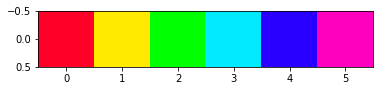

In [109]:
plt.imshow(np.array([[1,2,3,4,5,6]]),plt.get_cmap('gist_rainbow'), interpolation='nearest')
print(name)

In [4]:
fname = '5fps_TF=True_extract_AWIBF_0.0001_20epoch'

In [111]:
from sklearn.metrics import confusion_matrix
li = [0,1,2]
import pandas as pd
import os
true = []
pred = []
results_dir = './outputs_tecno/'+fname
for num in li:
    file_path = './outputs_tecno/'+fname+'/true_'+str(num)+'.pickle'
    data_true = pd.read_pickle(file_path)[0].tolist()
    for i in range(len(data_true)):
        true.append(actions_dict[data_true[i]])
    file_path = './outputs_tecno/'+fname+'/pred_'+str(num)+'.pickle'
    data_pred = pd.read_pickle(file_path)[0]
    confidence, predicted = torch.max(data_pred, 1)
    os.makedirs(results_dir+'/images',exist_ok=True)
    segment_bars_with_confidence(results_dir + '/images/{}.png'.format(str(num)),
                                confidence[0].tolist(),
                                data_true, predicted[0].tolist())
    for i in range(len(predicted[0].tolist())):
        pred.append(actions_dict[predicted[0].tolist()[i]])    


In [112]:
val_mat = confusion_matrix(true,pred,labels=name)

# metrics

## video average metrics

In [113]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

li = [0,1,2]
recs = []
precs = []
accs = []
f1s = []

for num in li:
    lines = []
    true = []
    preds = []
    file_path = './outputs_tecno/'+fname
    tmp = pd.read_pickle(file_path + '/pred_'+str(num)+'.pickle')
    tmp = torch.max(tmp[0], 1)[1][0].tolist()
    for i in range(len(tmp)):
        preds.append(actions_dict[tmp[i]])
    data = pd.read_pickle(file_path + '/true_'+str(num)+'.pickle')
    data = data[0].tolist()
    for i in range(len(data)):
        true.append(actions_dict[data[i]])
    recs.append(recall_score(true, preds, average='macro'))
    precs.append(precision_score(true, preds, average='macro'))
    accs.append(accuracy_score(true, preds))
    f1s.append(f1_score(true, preds, average='macro'))
print('recall',np.array(recs).sum()/len(li))
print('precision',np.array(precs).sum()/len(li))
print('f1',np.array(f1s).sum()/len(li))
print('accuracy',np.array(accs).sum()/len(li))
val_mat = confusion_matrix(preds,true,labels=name)

recall 0.6726638117451028
precision 0.6678061613887648
f1 0.6185661328876358
accuracy 0.7350115994669592


In [114]:
li = [0,1,2]
preds = []
true = []
for num in li:
    file_path = './outputs_tecno/'+fname
    tmp = pd.read_pickle(file_path + '/pred_'+str(num)+'.pickle')
    tmp = torch.max(tmp[0], 1)[1][0].tolist()
    for i in range(len(tmp)):
        preds.append(actions_dict[tmp[i]])
        data = pd.read_pickle(file_path + '/true_'+str(num)+'.pickle')
    data = data[0].tolist()
    for i in range(len(data)):
        true.append(actions_dict[data[i]])
val_mat = confusion_matrix(preds,true,labels=name)

print('recall',recall_score(true, preds, average=None),recall_score(true, preds, average='macro'))
print('precision',precision_score(true, preds, average=None),precision_score(true, preds, average='macro'))
print('f1',f1_score(true, preds, average=None),f1_score(true, preds, average='macro'))
print('accuracy',accuracy_score(true, preds))

recall [0.68407751 0.59212643 0.41582003 0.81672777 0.74809756 0.79587284] 0.675453688919311
precision [0.54569892 0.81983186 0.80308339 0.66853544 0.67583289 0.3879826 ] 0.6501608502354671
f1 [0.6071028  0.6876182  0.54793211 0.73523865 0.71013151 0.52165966] 0.6349471543776046
accuracy 0.6972089182493807


jaccard index

In [7]:
import numpy as np 
from sklearn.metrics import jaccard_score

In [5]:
li = [0,1,2]
preds = []
true = []
for num in li:
    file_path = './outputs_tecno/'+fname
    tmp = pd.read_pickle(file_path + '/pred_'+str(num)+'.pickle')
    tmp = torch.max(tmp[0], 1)[1][0].tolist()
    for i in range(len(tmp)):
        preds.append(actions_dict[tmp[i]])
        data = pd.read_pickle(file_path + '/true_'+str(num)+'.pickle')
    data = data[0].tolist()
    for i in range(len(data)):
        true.append(actions_dict[data[i]])
#val_mat = confusion_matrix(preds,true,labels=name)

print('jaccard',jaccard_score(true, preds, average=None),recall_score(true, preds, average='macro'))

NameError: name 'confusion_matrix' is not defined

In [10]:
print('jaccard',jaccard_score(true, preds, average=None),jaccard_score(true, preds, average='macro'))

jaccard [0.43585615 0.52394677 0.37734607 0.58132599 0.55054566 0.35286845] 0.470314847172358
